# Aim: Predict the daily revenue generated (in USD) based on the temperature (°C) outside

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import the data
ice = pd.read_csv("IceCreamData.csv")

# top 5 records of dataframe
ice.head()  

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [3]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
ice.isna().sum()

Temperature    0
Revenue        0
dtype: int64

In [5]:
ice.describe()

Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000

In [6]:
ice.dtypes

Temperature    float64
Revenue        float64
dtype: object

In [7]:
# Number of instances in the target class

ice['Revenue'].value_counts()

621.969209    1
654.197406    1
278.418265    1
401.433018    1
501.732990    1
             ..
827.684831    1
649.561175    1
478.598509    1
308.894518    1
684.803070    1
Name: Revenue, Length: 500, dtype: int64

# EDA

C:\Users\ruffi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue'>

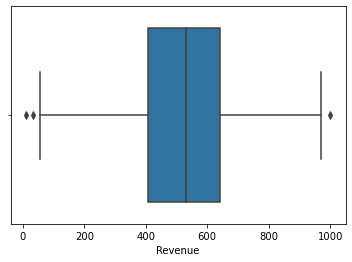

In [8]:
#boxplot of 'Revenue'
sns.boxplot(ice['Revenue'])

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

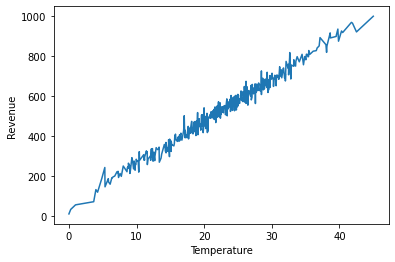

In [9]:
# Display how Revenue is related with Temperature using line plot.
sns.lineplot(data=ice, x="Temperature", y="Revenue")

<AxesSubplot:>

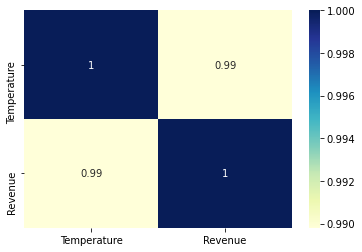

In [10]:
# Display the correlation between Temperature and Revenue.
sns.heatmap(ice.corr(), cmap="YlGnBu", annot = True)

**Data Preperation**


In [11]:
# predictor attribute  
X = ice.iloc[:,0].values.reshape(-1,1)   
# target attribute
y = ice.iloc[:,1].values.reshape(-1,1)        

In [12]:
y

array([[ 534.7990284 ],
       [ 625.1901215 ],
       [ 660.6322888 ],
       [ 487.7069603 ],
       [ 316.2401944 ],
       [ 367.9407438 ],
       [ 308.8945179 ],
       [ 696.7166402 ],
       [  55.39033824],
       [ 737.8008241 ],
       [ 325.9684084 ],
       [  71.16015301],
       [ 467.4467066 ],
       [ 289.5409341 ],
       [ 905.4776043 ],
       [ 469.9090332 ],
       [ 648.2099977 ],
       [ 921.508275  ],
       [ 649.5611747 ],
       [ 534.6228653 ],
       [ 612.1539491 ],
       [ 353.3256334 ],
       [ 524.2361154 ],
       [ 374.231135  ],
       [ 523.1245467 ],
       [ 473.6043349 ],
       [ 402.4553204 ],
       [ 679.3177906 ],
       [ 517.5340283 ],
       [ 809.6720534 ],
       [ 528.3804165 ],
       [ 356.0980075 ],
       [ 237.7639106 ],
       [ 418.1372788 ],
       [ 809.4634112 ],
       [ 870.7659159 ],
       [ 550.2785159 ],
       [ 405.6614459 ],
       [ 740.9356848 ],
       [ 501.7329901 ],
       [ 539.6880057 ],
       [ 242.236

**Split the dataset for test and train**

In [13]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state=0)

**Building Linear Regression model**

In [14]:
# import the Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

**Initialize the Linear Regression model**

In [15]:
#initialize the linear regression model
regressor=LinearRegression()
regressor

LinearRegression()

**Fitting the Linear Regression Model**

In [16]:
#fit the Linear Regression Model
regressor.fit(X_train,y_train)

LinearRegression()

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [17]:
# Predicted the result
y_pred=regressor.predict(X_test)
y_pred


array([[698.3385558 ],
       [653.32331149],
       [664.73027451],
       [450.5192845 ],
       [665.47469743],
       [441.36861407],
       [584.06540609],
       [623.82532723],
       [667.48717467],
       [468.72433832],
       [546.82733151],
       [443.41191785],
       [622.95162777],
       [377.64639971],
       [367.0607334 ],
       [945.67057977],
       [893.79551974],
       [694.45445099],
       [546.05047608],
       [420.58523672],
       [391.08500303],
       [597.0141581 ],
       [283.23582775],
       [655.50055011],
       [380.98796154],
       [412.31810124],
       [371.05055651],
       [510.23910289],
       [479.70270426],
       [456.68206658],
       [640.1157508 ],
       [281.65224383],
       [314.1894674 ],
       [470.01363777],
       [559.72453055],
       [539.75091165],
       [307.72368191],
       [508.65180339],
       [571.43237276],
       [732.25599161],
       [440.44010989],
       [494.39422767],
       [567.56536766],
       [443

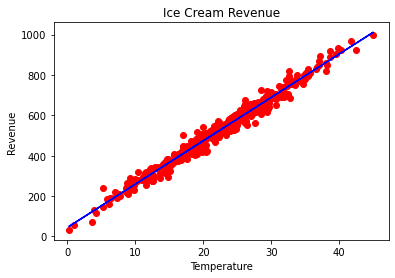

In [18]:
# Visualizing the Result (Training_Set)
plt.scatter(X_train,y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue' )
plt.title('Ice Cream Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

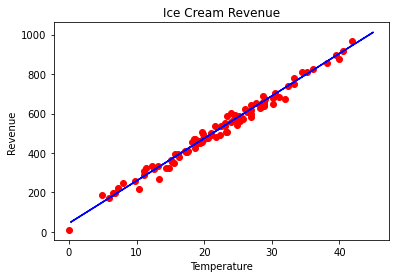

In [19]:
# Visualizing the Result (Test Set)
plt.scatter(X_test,y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Ice Cream Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [20]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[43.73357869]
[[21.5133908]]


**Evaluation of Model**

In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.3032135301029
Mean Squared Error: 528.2150684519345
Root Mean Squared Error: 22.982929936192523


In [22]:
from sklearn.metrics import r2_score
print('R-squared:',r2_score(y_test, y_pred))

R-squared: 0.9837324255882576
